In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
(trainX,trainY),(testX,testY) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

In [4]:
trainY_cat = tf.keras.utils.to_categorical(trainY)
testY_cat = tf.keras.utils.to_categorical(testY)

In [5]:
trainNorm = trainX.astype('float32')
testNorm = testX.astype('float32')
trainNorm = trainNorm/255.0
testNorm = testNorm/255.0

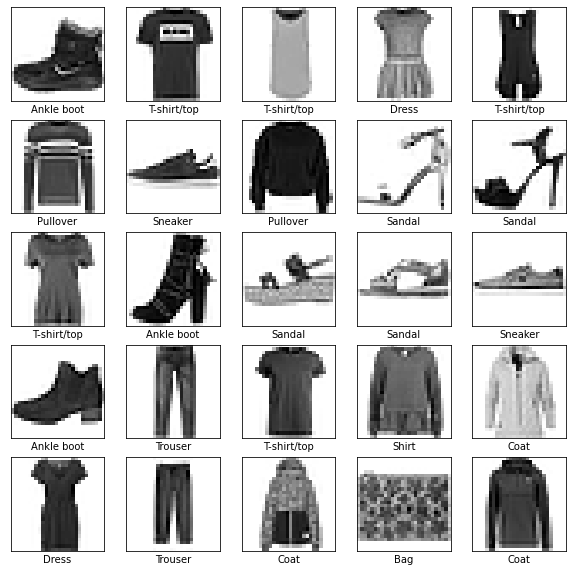

In [6]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()
     


In [7]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu', padding='same', name='conv-layer-1'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-1'),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', name='conv-layer-2'),
    tf.keras.layers.AvgPool2D(pool_size=(2, 2), name='pooling-layer-2'),
    tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
    tf.keras.layers.Dense(len(class_names), activation="softmax", name="output-layer")
])
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])
history = model.fit(trainX, trainY_cat, epochs=10, validation_data=(testX, testY_cat))

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8282 - accuracy: 0.7167 - val_loss: 0.5931 - val_accuracy: 0.7993
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5378 - accuracy: 0.8119 - val_loss: 0.5108 - val_accuracy: 0.8249
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4824 - accuracy: 0.8312 - val_loss: 0.4750 - val_accuracy: 0.8344
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4426 - accuracy: 0.8414 - val_loss: 0.5863 - val_accuracy: 0.7908
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.4161 - accuracy: 0.8528 - val_loss: 0.4550 - val_accuracy: 0.8416
Epoch 6/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.3916 - accuracy: 0.8622 - val_loss: 0.4073 - val_accuracy: 0.8611
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3738 - accuracy: 0.8683 - val_loss: 0.3787 -

In [8]:

tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv-layer-1 (Conv2D)       (None, 28, 28, 64)        640       
                                                                 
 pooling-layer-1 (AveragePo  (None, 14, 14, 64)        0         
 oling2D)                                                        
                                                                 
 conv-layer-2 (Conv2D)       (None, 14, 14, 32)        18464     
                                                                 
 pooling-layer-2 (AveragePo  (None, 7, 7, 32)          0         
 oling2D)                                                        
                                                                 
 pooling-layer-3 (GlobalAve  (None, 32)                0         
 ragePooling2D)                                                  
                                                        

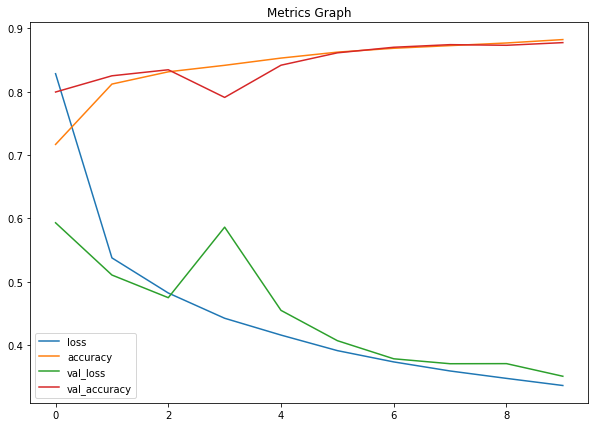

In [10]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics Graph")
plt.show()

In [11]:
model.evaluate(testX, testY_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.3512 - accuracy: 0.8772


[0.35117408633232117, 0.8772000074386597]

In [12]:
predictions = model.predict(testX)

313/313 [==============================] - 2s 7ms/step


In [13]:

y_test = tf.argmax(testY_cat, axis=1)
y_test = tf.Variable(y_test)

In [14]:
predictions_labels = np.argmax(predictions, axis=1)
print(metrics.accuracy_score(y_test, predictions_labels))

0.8772


In [15]:
print(metrics.classification_report(y_test, predictions_labels))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.78      0.81      1000
           3       0.81      0.90      0.85      1000
           4       0.72      0.86      0.78      1000
           5       0.98      0.97      0.98      1000
           6       0.74      0.58      0.65      1000
           7       0.94      0.97      0.96      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



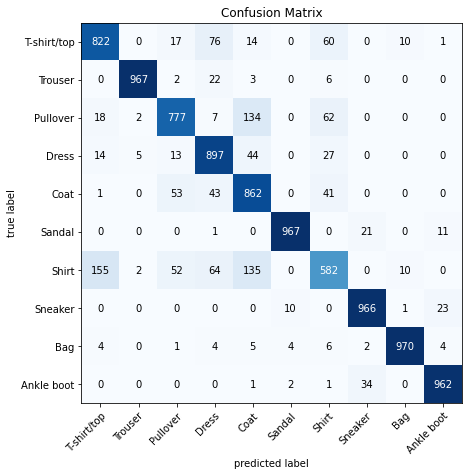

In [16]:
cm = metrics.confusion_matrix(y_test, predictions_labels)
plot_confusion_matrix(cm, figsize=(10,7), class_names=class_names)
plt.title("Confusion Matrix")
plt.show()